# Package Management

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Custom Function

In [5]:
def read_file(file_path):
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.lower().str.strip().str.replace(r'[\s-]+','_', regex=True)
    return df

# Load Dataset

In [6]:
data = read_file('Data/drug_classification.csv')

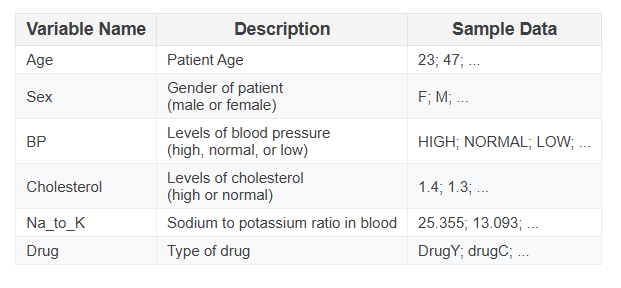

In [7]:
data.head()

,age,sex,bp,cholesterol,na_to_k,drug_type
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          200 non-null    int64  
 1   sex          200 non-null    object 
 2   bp           200 non-null    object 
 3   cholesterol  200 non-null    object 
 4   na_to_k      200 non-null    float64
 5   drug_type    200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# Cleaning and Transforming Data

In [11]:
data.describe()

,age,na_to_k
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [16]:
data['age'].describe()

count    200.000000
mean      44.315000
std       16.544315
min       15.000000
25%       31.000000
50%       45.000000
75%       58.000000
max       74.000000
Name: age, dtype: float64

In [14]:
data['bp'].value_counts()

bp
HIGH      77
LOW       64
NORMAL    59
Name: count, dtype: int64

In [17]:
data['cholesterol'].value_counts()

cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [18]:
data['drug_type'].value_counts()

drug_type
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [19]:
data['sex'].value_counts()

sex
M    104
F     96
Name: count, dtype: int64

<Axes: >

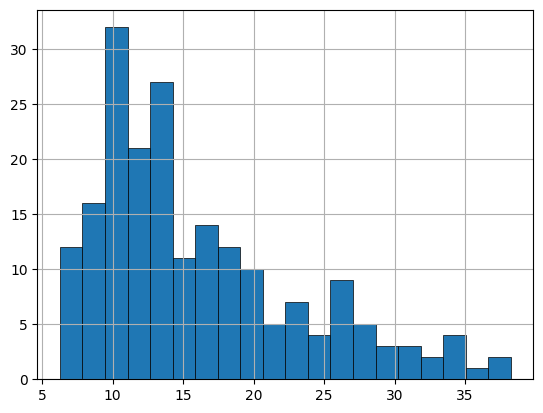

In [26]:
data['na_to_k'].hist(bins=20, edgecolor = 'black', linewidth = 0.5)

In [27]:
data.columns

Index(['age', 'sex', 'bp', 'cholesterol', 'na_to_k', 'drug_type'], dtype='object')

In [28]:
# Numeric features -- 'age','na_to_k'
# Categorical features --  'sex', 'bp', 'cholesterol', 'drug_type'

In [30]:
data['sex'].value_counts()

sex
M    104
F     96
Name: count, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le

LabelEncoder()

In [34]:
data['sex'] = le.fit_transform(data['sex'])

In [35]:
le

LabelEncoder()

In [36]:
data.head()

,age,sex,bp,cholesterol,na_to_k,drug_type
0,23,0,HIGH,HIGH,25.355,DrugY
1,47,1,LOW,HIGH,13.093,drugC
2,47,1,LOW,HIGH,10.114,drugC
3,28,0,NORMAL,HIGH,7.798,drugX
4,61,0,LOW,HIGH,18.043,DrugY


In [39]:
le.classes_

array(['F', 'M'], dtype=object)

In [50]:
data['cholesterol'].value_counts()

cholesterol
HIGH      103
NORMAL     97
Name: count, dtype: int64

In [51]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder_bp = OrdinalEncoder(categories=[['LOW','NORMAL','HIGH']])
ordinal_encoder_chol = OrdinalEncoder(categories = [['NORMAL','HIGH']])

ordinal_encoder_chol

,categories,"[['NORMAL', 'HIGH']]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [52]:
data['bp'] = ordinal_encoder_bp.fit_transform(data['bp'].values.reshape(-1,1))
data['cholesterol'] = ordinal_encoder_chol.fit_transform(data['cholesterol'].values.reshape(-1,1))

In [54]:
data['drug_type'].value_counts()

drug_type
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [55]:
le_drug_type = LabelEncoder()
le_drug_type


LabelEncoder()

In [58]:
data['drug_type'] = data['drug_type'].replace(['DrugY', 'drugX', 'drugA', 'drugC', 'drugB'], [1, 2, 3, 4, 5])

C:\Users\nikhi\AppData\Local\Temp\ipykernel_23892\767650791.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['drug_type'] = data['drug_type'].replace(['DrugY', 'drugX', 'drugA', 'drugC', 'drugB'], [1, 2, 3, 4, 5])


In [62]:
data

,age,sex,bp,cholesterol,na_to_k,drug_type,Drug_Type
0,23,0,2.0,1.0,25.355,1,1
1,47,1,0.0,1.0,13.093,4,4
2,47,1,0.0,1.0,10.114,4,4
3,28,0,1.0,1.0,7.798,2,2
4,61,0,0.0,1.0,18.043,1,1
...,...,...,...,...,...,...,...
195,56,0,0.0,1.0,11.567,4,4
196,16,1,0.0,1.0,12.006,4,4
197,52,1,1.0,1.0,9.894,2,2
198,23,1,1.0,0.0,14.020,2,2


In [63]:
data.drop(columns = ['Drug_Type'], axis = 1, inplace = True)

In [65]:
data.head()

,age,sex,bp,cholesterol,na_to_k,drug_type
0,23,0,2.0,1.0,25.355,1
1,47,1,0.0,1.0,13.093,4
2,47,1,0.0,1.0,10.114,4
3,28,0,1.0,1.0,7.798,2
4,61,0,0.0,1.0,18.043,1


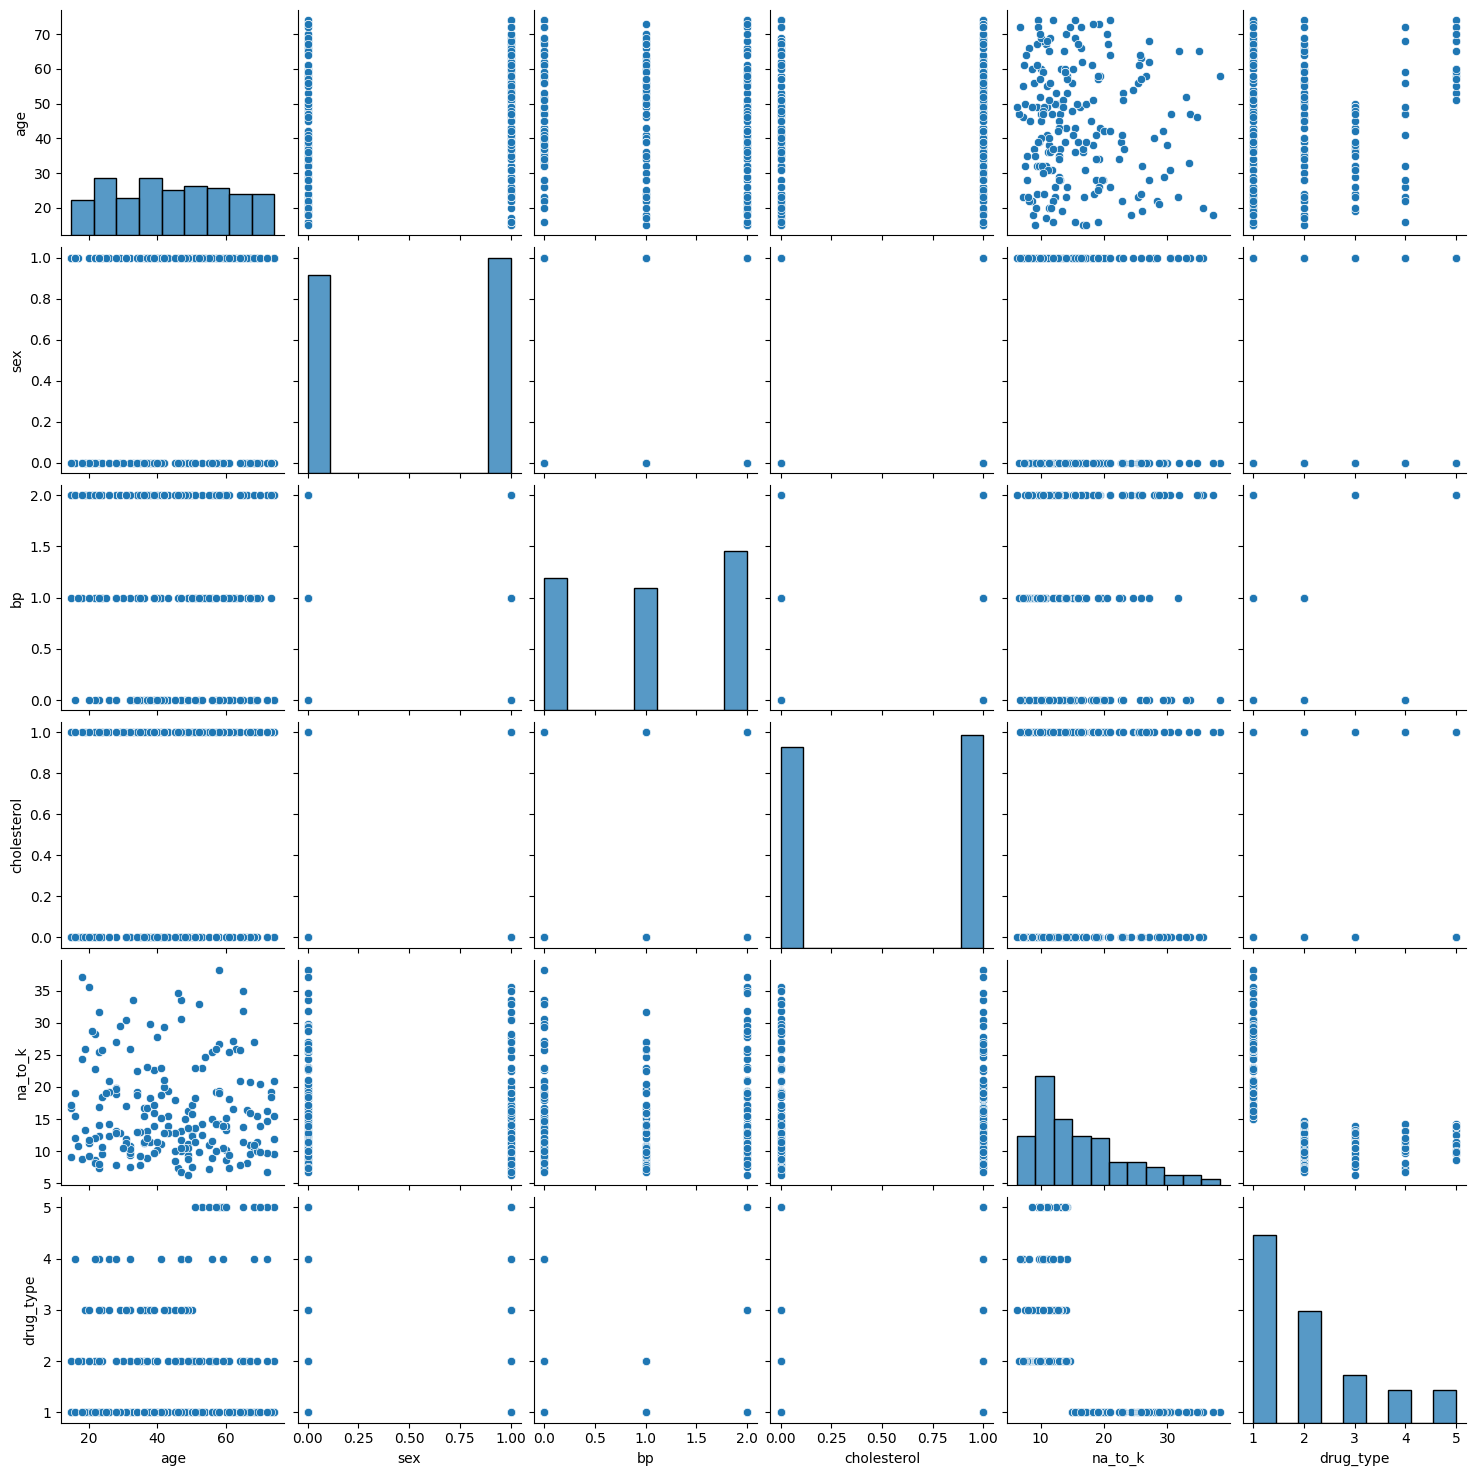

In [67]:
sns.pairplot(data)

plt.show()

# EDA

In [68]:
data.head()

,age,sex,bp,cholesterol,na_to_k,drug_type
0,23,0,2.0,1.0,25.355,1
1,47,1,0.0,1.0,13.093,4
2,47,1,0.0,1.0,10.114,4
3,28,0,1.0,1.0,7.798,2
4,61,0,0.0,1.0,18.043,1


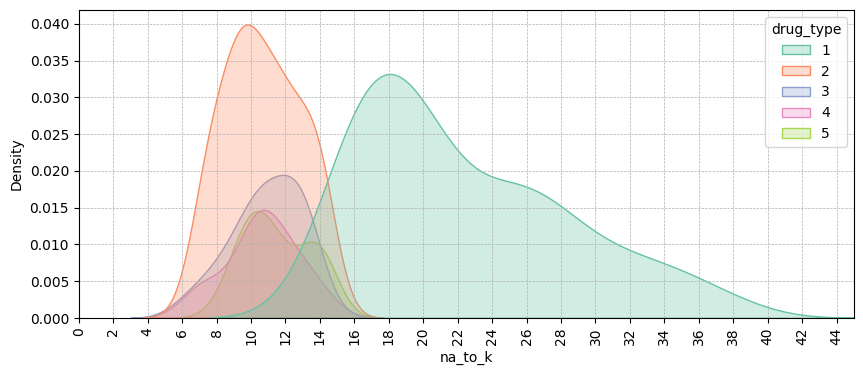

In [113]:
plt.figure(figsize = (10,4))

sns.kdeplot(data = data, x = 'na_to_k', fill = True, 
            hue = 'drug_type', alpha = 0.3, 
            palette= 'Set2',)

plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)
plt.xticks(np.arange(0,46,2), rotation=90)

plt.xlim(0,45)

plt.show()

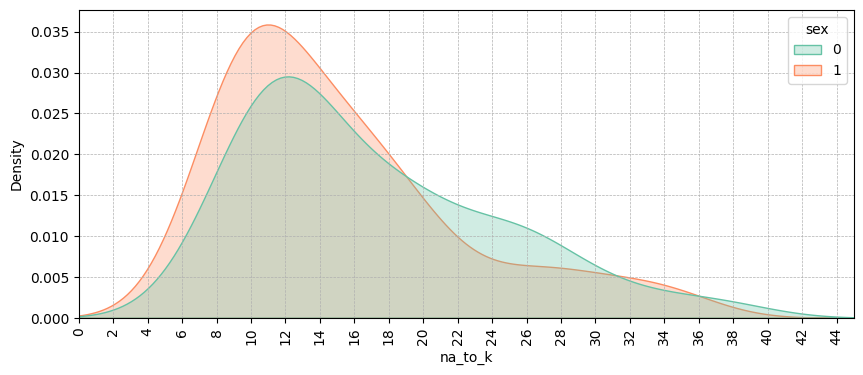

In [112]:
plt.figure(figsize = (10,4))

sns.kdeplot(data = data, x = 'na_to_k', hue = 'sex',
            fill = True, alpha = 0.3, palette = 'Set2',
            )

plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)
plt.xticks(np.arange(0,46,2), rotation=90)

plt.xlim(0, 45)

plt.show()

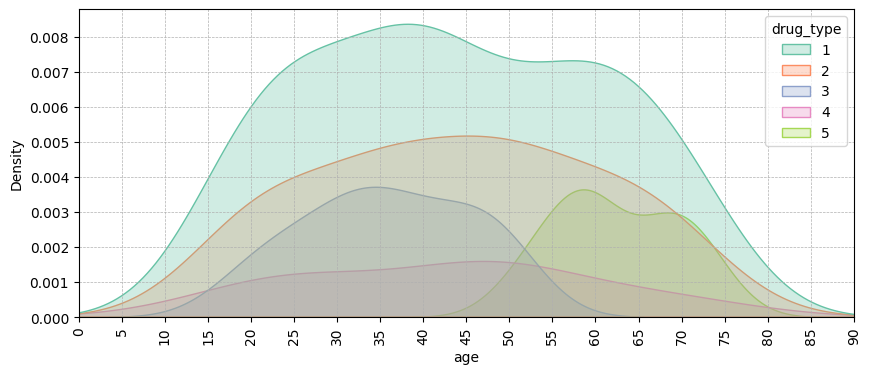

In [111]:
plt.figure(figsize = (10,4))

sns.kdeplot(data = data, x = 'age', hue = 'drug_type',
            fill = True, alpha = 0.3, palette = 'Set2',
            )

plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)
plt.xticks(np.arange(0,91,5), rotation=90)
plt.xlim(0,90)

plt.show()

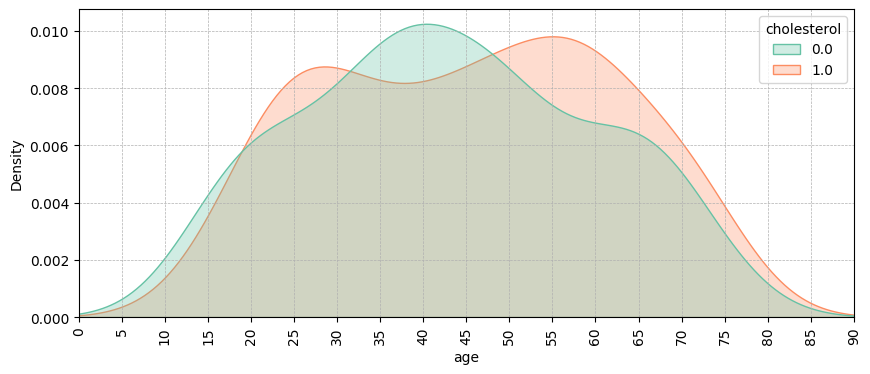

In [114]:
plt.figure(figsize = (10,4))

sns.kdeplot(data = data, x = 'age', hue = 'cholesterol',
            fill = True, alpha = 0.3, palette = 'Set2',
            )

plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)
plt.xticks(np.arange(0,91,5), rotation=90)
plt.xlim(0,90)

plt.show()

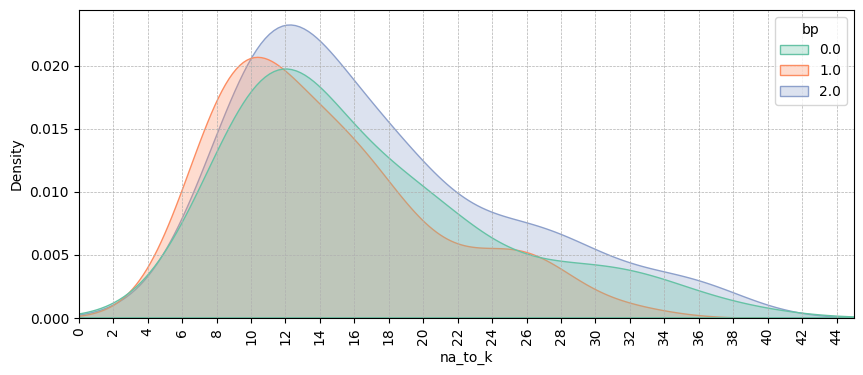

In [120]:
plt.figure(figsize = (10,4))

sns.kdeplot(data = data, x = 'na_to_k', hue = 'bp',
            fill = True, alpha = 0.3, palette = 'Set2',
            )

plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)
plt.xticks(np.arange(0,46,2), rotation=90)
plt.xlim(0,45)

plt.show()

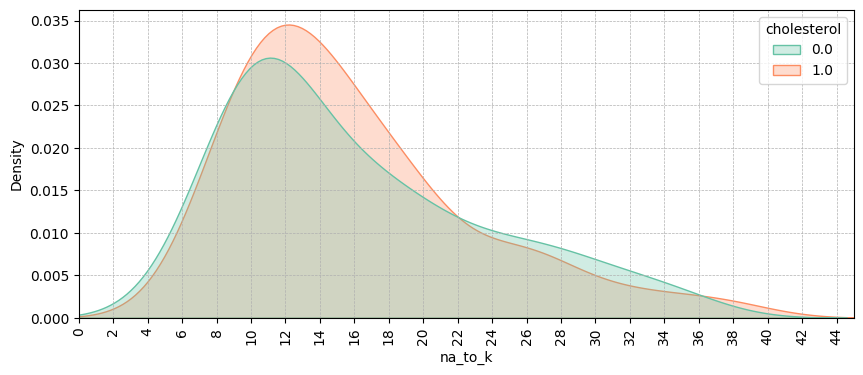

In [121]:
plt.figure(figsize = (10,4))

sns.kdeplot(data = data, x = 'na_to_k', hue = 'cholesterol',
            fill = True, alpha = 0.3, palette = 'Set2',
            )

plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)
plt.xticks(np.arange(0,46,2), rotation=90)
plt.xlim(0,45)

plt.show()

In [116]:
ordinal_encoder_chol.categories_

[array(['NORMAL', 'HIGH'], dtype=object)]